In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

def holt_winters(ts, alpha, beta, gamma, seasonal_periods):
    level = ts[0]
    trend = np.mean(np.diff(ts[:seasonal_periods]))
    seasonals = np.zeros(seasonal_periods)
    
    forecast = np.zeros(len(ts))
    
    for i in range(len(ts)):
        value = ts[i]
        last_level, level = level, alpha * (value - seasonals[i % seasonal_periods]) + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        seasonals[i % seasonal_periods] = gamma * (value - level) + (1 - gamma) * seasonals[i % seasonal_periods]
        forecast[i] = level + trend + seasonals[i % seasonal_periods]
    
    return forecast

In [19]:
seasonal_periods = 12
data = pd.read_csv('data/Alcohol_Sales.csv.xls').iloc[:,1]

In [14]:
def mse(params, ts, seasonal_periods):
    alpha, beta, gamma = params
    forecast = holt_winters(ts, alpha, beta, gamma, seasonal_periods)
    mse = np.mean((ts - forecast)**2)
    return mse

# Начальные параметры для оптимизации
initial_params = [0.2, 0.2, 0.2]

# Оптимизация параметров
result = minimize(mse, initial_params, args=(data, seasonal_periods), method='L-BFGS-B')

# Получение оптимальных параметров
optimal_params = result.x
print(optimal_params)

[0.07588584 0.15910205 1.00298461]


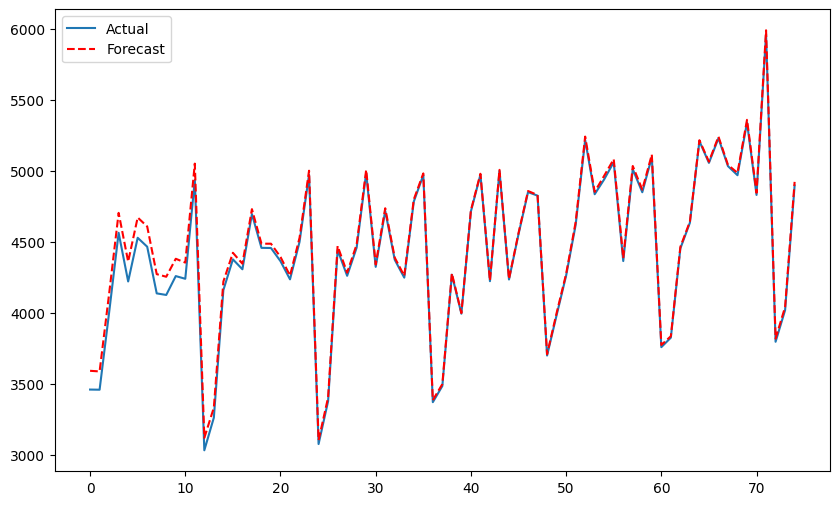

In [18]:
# Прогноз с использованием оптимальных параметров
forecast = holt_winters(data, *optimal_params, seasonal_periods)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(data[:-250], label='Actual')
plt.plot(forecast[:-250], label='Forecast', linestyle='dashed', color='red')
plt.legend()
plt.show()